In [1]:
from code_book_embed import *
ms.use('seaborn-muted')
%matplotlib inline

Test Multiple Waveforms for Compatible Performance

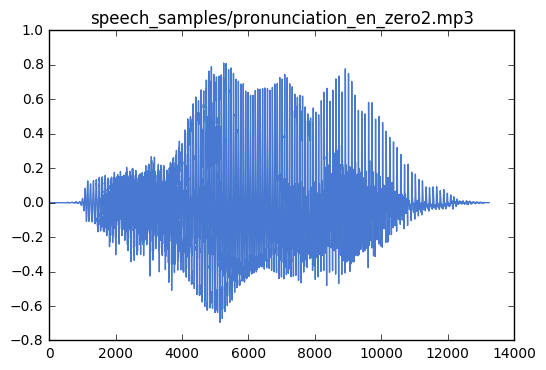

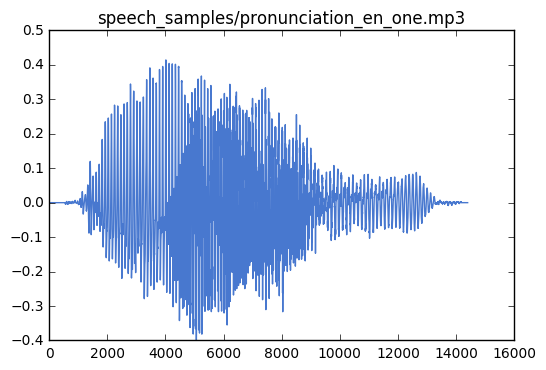

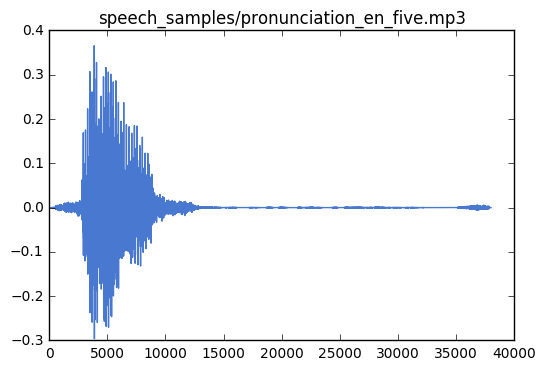

In [2]:
path_to_source = "audio_samples/woman2_orig.wav"
# sample_path_list = ['speech_samples/pronunciation_en_zero2.mp3', 'speech_samples/pronunciation_en_one.mp3', 
#                    'speech_samples/pronunciation_en_two2.mp3', 'speech_samples/pronunciation_en_three.mp3',
#                    'speech_samples/pronunciation_en_four.mp3', 'speech_samples/pronunciation_en_five.mp3',
#                    'speech_samples/pronunciation_en_six.mp3', 'speech_samples/pronunciation_en_seven.mp3', 
#                    'speech_samples/pronunciation_en_eight2.mp3', 'speech_samples/pronunciation_en_nine.mp3']

sample_path_list = ['speech_samples/pronunciation_en_zero2.mp3', 'speech_samples/pronunciation_en_one.mp3',
                    'speech_samples/pronunciation_en_five.mp3']

for s in sample_path_list:
    view_sample(s)

[13248, 14400, 38016]


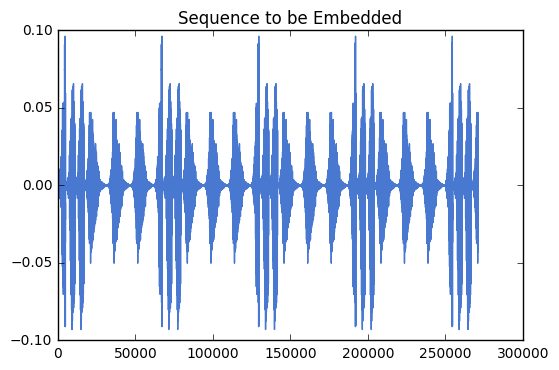

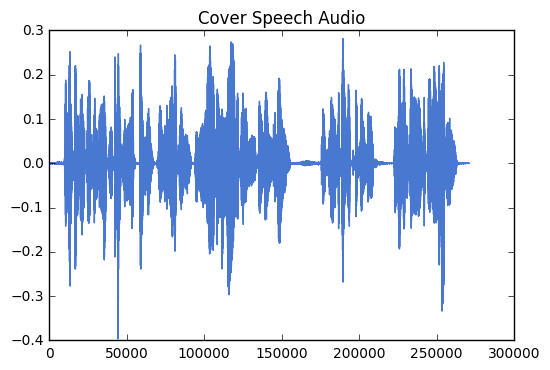

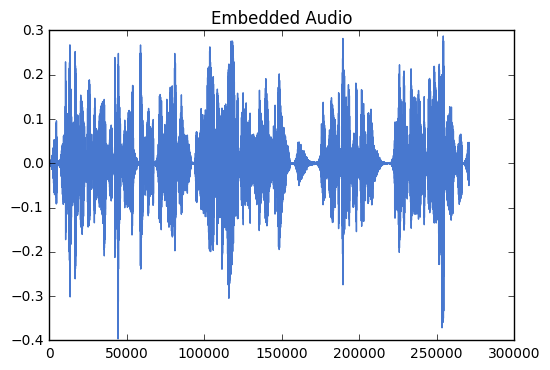

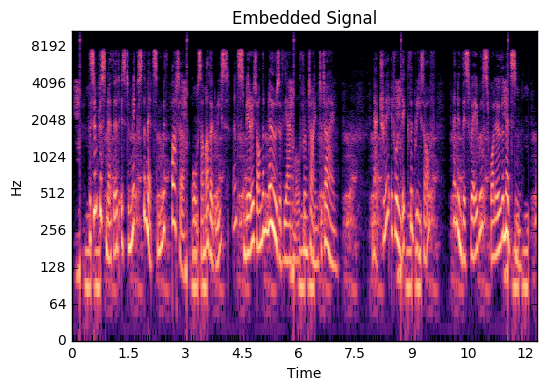

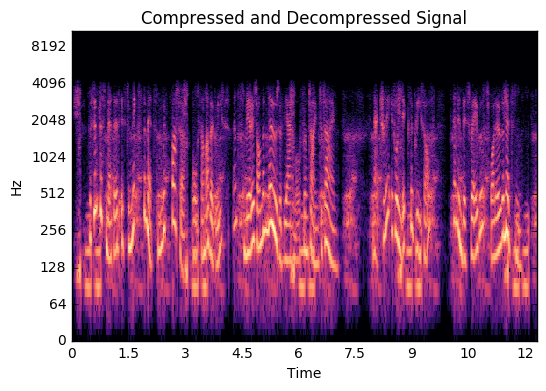

In [3]:

E2 = Embed(path_to_source, sample_path_list, [0,1,2], [0,1,1,2,2,2])

# mess around with the codebook waveforms before embedding
#E2.truncate(0.4, idx_list=[0,1])
# E2.energy(0.4)
# E2.pitch_shift(-15)

E2.truncate(0.4, idx_list=[0,1,2])
E2.energy(0.2, idx_list=[0])
E2.energy(0.3, idx_list=[1,2])
E2.pitch_shift(-15, idx_list=[0,1,2])

embed2 = E2.get_embedded_audio(plot=True)
d_embed2, sr = compress_and_decompress(embed2, "compression_samples/", plot=True)

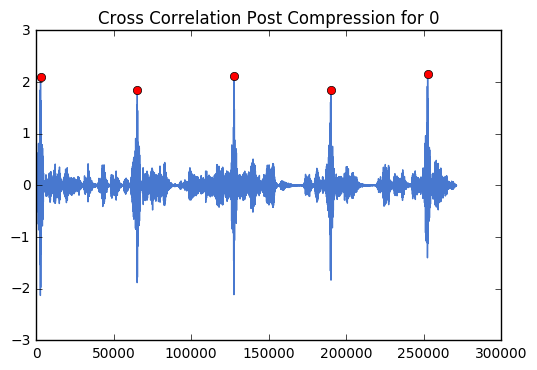

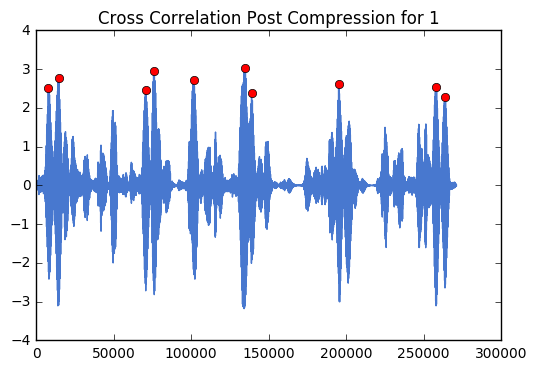

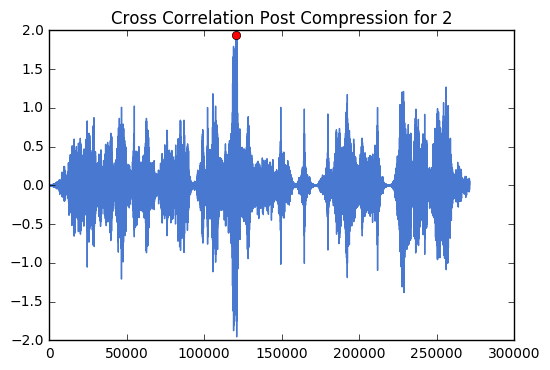

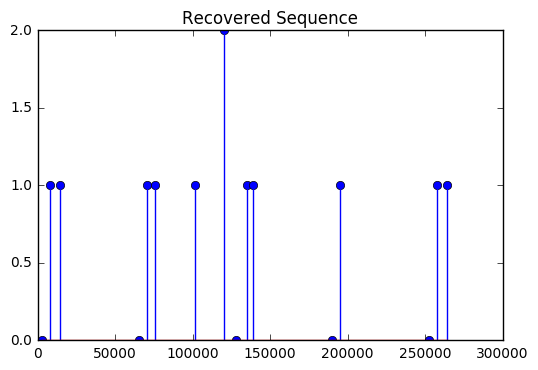

[0 1 1 0 1 1 1 2 0 1 1 0 1 0 1 1]


In [4]:
# get the timeseries of the the original waveforms and recover
w2 = E2.get_data_timeseries()
R2 = Recover(d_embed2, w2, [0,1,2], [0,1,1,2,2,2])
final_sequence2 = R2.get_bit_sequence(thres=0.85, plot=True)
print final_sequence2

In [5]:
Audio(d_embed2, rate=sr)